In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 

url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/2.1 auto-mpg.csv'
df = pd.read_csv(url).fillna(0)
feature = df[['mpg']]

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,50))
scale_feature = minmax_scale.fit_transform(feature)
print(scale_feature)
print('Mean:',round(scale_feature.mean()))
print('Standard deviation:',round(scale_feature.std()))
 

[[11.96808511]
 [16.62234043]
 [19.54787234]
 [13.29787234]
 [20.34574468]
 [18.61702128]
 [24.46808511]
 [19.94680851]
 [14.62765957]
 [18.61702128]
 [33.64361702]
 [26.59574468]
 [22.60638298]
 [16.62234043]
 [27.92553191]
 [23.40425532]
 [25.79787234]
 [21.27659574]
 [23.93617021]
 [25.26595745]
 [33.24468085]
 [23.93617021]
 [30.71808511]
 [27.92553191]
 [28.59042553]
 [26.59574468]
 [25.26595745]
 [21.27659574]
 [14.62765957]
 [15.95744681]
 [17.28723404]
 [25.26595745]
 [20.61170213]
 [29.25531915]
 [22.60638298]
 [34.57446809]
 [19.81382979]
 [31.78191489]
 [30.31914894]
 [42.28723404]
 [37.23404255]
 [37.5       ]
 [38.56382979]
 [24.20212766]
 [25.26595745]
 [37.23404255]
 [17.28723404]
 [19.94680851]
 [30.58510638]
 [30.58510638]
 [29.25531915]
 [40.42553191]
 [32.57978723]
 [23.93617021]
 [23.93617021]
 [26.59574468]
 [22.34042553]
 [35.90425532]
 [25.13297872]
 [25.26595745]
 [22.60638298]
 [25.26595745]
 [21.27659574]
 [35.50531915]
 [32.57978723]
 [29.12234043]
 [30.58510

In [2]:
from sklearn.preprocessing import FunctionTransformer
feature = df[['cylinders']]
#Define a simple function
def add_ten(x):
    return x + 10
#create transform
ten_transformer = FunctionTransformer(add_ten,validate=True)
#transform feature matrix
ten_transformer.transform(feature)

C:\Users\Ahmadi\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],
       [14],

In [3]:
#Detecting outliers with quartiles
anomalies = []
index_val = []
q1 = np.percentile(df['acceleration'],25,interpolation='midpoint')
q3 = np.percentile(df['acceleration'],75,interpolation='midpoint')
iqr =  q3 - q1
print("The value of quartile Q1 is:",q1)
print("The value of quartile Q3 is:",q3)
print("The Inter quartile range is:",iqr)

lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
print("The lower bound value is:",lower_bound)
print("The upper bound value is:",lower_bound)

#Generate outliers
for indexval, outlier in enumerate (df['acceleration']):
    if outlier < lower_bound or outlier > upper_bound:
        index_val.append(indexval)
        anomalies.append(outlier)
print('outliers value are:')
print(anomalies)
print('outlier value indexes are:')
print(index_val)

The value of quartile Q1 is: 13.850000000000001
The value of quartile Q3 is: 17.15
The Inter quartile range is: 3.299999999999997
The lower bound value is: 8.900000000000006
The upper bound value is: 8.900000000000006
outliers value are:
[22.2, 22.1, 24.8, 23.5, 23.7, 24.6, 8.5, 22.2, 8.0, 8.5]
outlier value indexes are:
[25, 32, 127, 197, 202, 203, 296, 376, 381, 384]


In [4]:
#handeling outliers
#1.dropping the values of outliers from df
clean_df = df.loc[(df['acceleration']>lower_bound)&(df['acceleration']<upper_bound)]
clean_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3
1,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4
2,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
3,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
4,24.3,4,151.0,90,3003,20.1,80,1,amc concord
...,...,...,...,...,...,...,...,...,...
393,14.0,8,400.0,175,4385,12.0,72,1,pontiac catalina
394,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham
395,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix
396,16.0,8,400.0,180,4220,11.1,77,1,pontiac grand prix lj


In [5]:
#2.mark them as outliers and include it as a feature
new_df = df
new_df['outlier'] = np.where((df['acceleration'] >lower_bound)&(df['acceleration']<upper_bound),0,1)
new_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,outlier
0,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3,0
1,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4,0
2,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs,0
3,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe,0
4,24.3,4,151.0,90,3003,20.1,80,1,amc concord,0
...,...,...,...,...,...,...,...,...,...,...
393,14.0,8,400.0,175,4385,12.0,72,1,pontiac catalina,0
394,14.0,8,400.0,175,4464,11.5,71,1,pontiac catalina brougham,0
395,16.0,8,400.0,230,4278,9.5,73,1,pontiac grand prix,0
396,16.0,8,400.0,180,4220,11.1,77,1,pontiac grand prix lj,0


In [6]:
url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/1.1 titanic.csv'
df = pd.read_csv(url)
df.dropna(inplace=True)
df

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [7]:
#Encoding nominal categorical features
#you have a feature with nominal classes(categorical data) that has no intrinsic ordering
#one-hot encode the feature using sickit-learn's LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv(url).fillna(0)
df = df.drop('SexCode',axis=1)
print(df.dtypes)

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
dtype: object


In [8]:
one_hot = LabelBinarizer()
df['Sex'] = one_hot.fit_transform(df['Sex'])
print(one_hot.classes_)
df

['female' 'male']


,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,0,1
1,"Allison, Miss Helen Loraine",1st,2.00,0,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,1,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,1,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,1,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,1,0
1310,"Zenni, Mr Philip",3rd,22.00,1,0
1311,"Lievens, Mr Rene",3rd,24.00,1,0


In [9]:
scale_mapper = {'1st':1,'2nd':2,'3rd':3}
df['PClass'] = df['PClass'].replace(scale_mapper)
df

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1,29.00,0,1
1,"Allison, Miss Helen Loraine",1,2.00,0,0
2,"Allison, Mr Hudson Joshua Creighton",1,30.00,1,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,0,0
4,"Allison, Master Hudson Trevor",1,0.92,1,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3,27.00,1,0
1309,"Zakarian, Mr Maprieder",3,26.00,1,0
1310,"Zenni, Mr Philip",3,22.00,1,0
1311,"Lievens, Mr Rene",3,24.00,1,0


<Axes: >

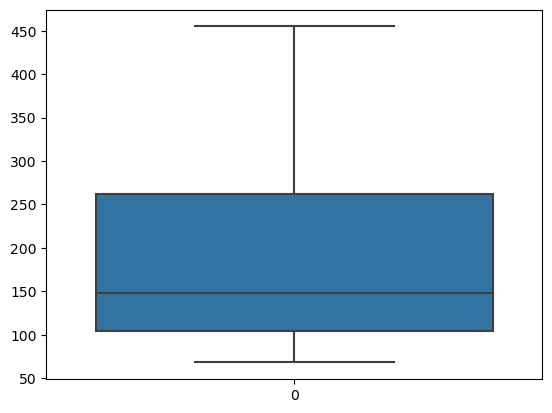

In [10]:
#explore data,visualize data
#BoxPlot,Histogram,ScatterPlot and TwoWayCrossTabulation
import pandas as pd
import seaborn as sn

url = 'C:/Users/Ahmadi/OneDrive/Desktop/datasets/2.1 auto-mpg.csv'
df = pd.read_csv(url)
df.head(5)
sn.boxplot(df['displacement'])

<Axes: >

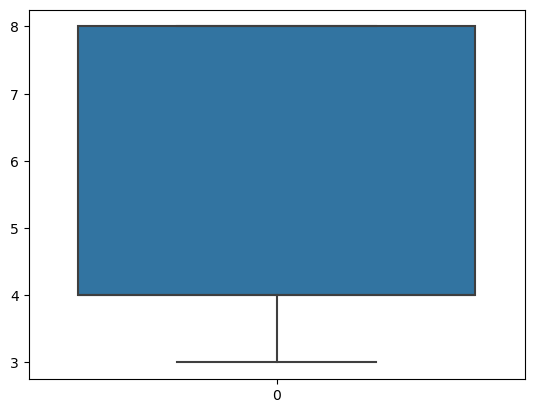

In [11]:
sn.boxplot(df['cylinders'])

<Axes: >

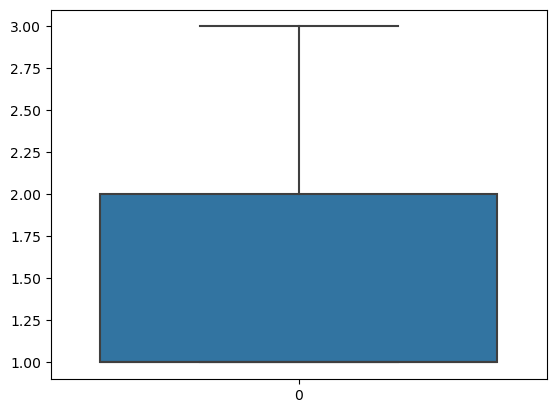

In [12]:
sn.boxplot(df['origin'])

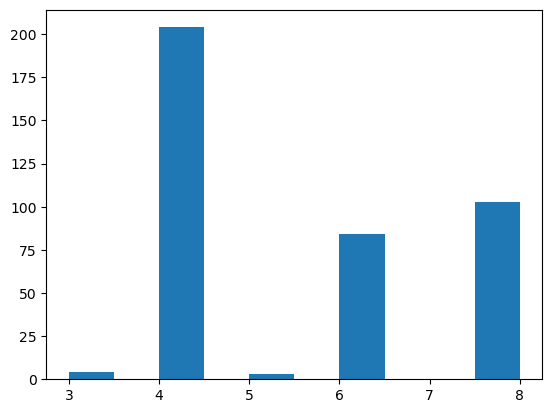

In [13]:
#plotting histogram using matplotlib library with hist()
import matplotlib.pyplot as plt
plt.hist(df['cylinders'], bins=10)
plt.show()

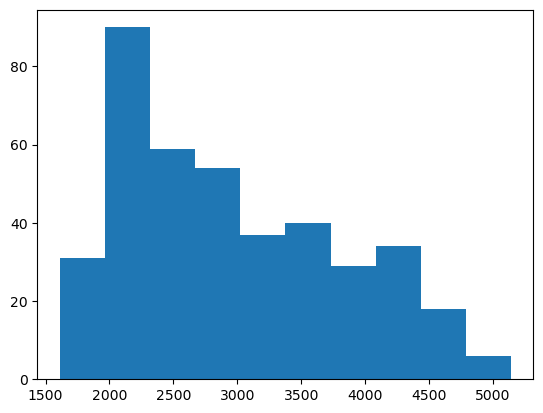

In [14]:
plt.hist(df['weight'], bins=10)
plt.show()

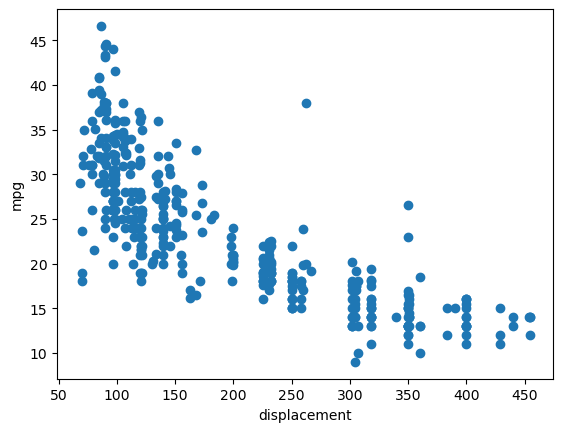

In [15]:
#plotting scatter plot using matplotlib library with scatter
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.scatter(x=df['displacement'],y=df['mpg'])
plt.show()

In [16]:
#creating crosstab with pandas using crosstab()
import pandas as pd
import seaborn as sn
pd.crosstab(index=df['origin'],columns=df['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
1,0,72,0,74,103
2,0,63,3,4,0
3,4,69,0,6,0


In [17]:
pd.crosstab(index=df['origin'],columns=df['model year'])

model year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
1,22,20,18,29,15,20,22,18,22,23,7,13,20
2,5,4,5,7,6,6,8,4,6,4,9,4,2
3,2,4,5,4,6,4,4,6,8,2,13,12,9
